In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
cab_df = pd.read_csv("Cab_Data.csv")
city_df = pd.read_csv("City.csv")
cust_id = pd.read_csv("Customer_ID.csv")
trans_df = pd.read_csv("Transaction_ID.csv")

In [3]:
merged_data_outer = pd.merge(cab_df, trans_df, how="outer", on="Transaction ID")
df_test = pd.merge(merged_data_outer, cust_id, how="outer", on="Customer ID")

In [4]:
df_test.shape, df_test.isnull().sum()

((440098, 12),
 Transaction ID            0
 Date of Travel        80706
 Company               80706
 City                  80706
 KM Travelled          80706
 Price Charged         80706
 Cost of Trip          80706
 Customer ID               0
 Payment_Mode              0
 Gender                    0
 Age                       0
 Income (USD/Month)        0
 dtype: int64)

## There are missing values in the dataframe. 

In [5]:
merged_data_inner = pd.merge(cab_df, trans_df, how="inner", on="Transaction ID")
master_df = pd.merge(merged_data_inner, cust_id, how="inner", on="Customer ID")

In [6]:
master_df.shape, master_df.isnull().sum()

((359392, 12),
 Transaction ID        0
 Date of Travel        0
 Company               0
 City                  0
 KM Travelled          0
 Price Charged         0
 Cost of Trip          0
 Customer ID           0
 Payment_Mode          0
 Gender                0
 Age                   0
 Income (USD/Month)    0
 dtype: int64)

## The date format was changed

In [7]:
#Change date format
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

master_df['Date of Travel'] = master_df['Date of Travel'].apply(lambda x:to_date_format(x))

In [8]:
months=[]
years =[]
for i in range(len(master_df['Date of Travel'])):
    months.append(master_df['Date of Travel'][i].month)
    years.append(master_df['Date of Travel'][i].year)
master_df['Month'] = months
master_df['Year'] = years

master_df.drop('Date of Travel', axis=1, inplace=True)

In [9]:
master_df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,1,2016


In [10]:
master_df = master_df.rename(columns={'Transaction ID': 'Transaction_ID'})

In [11]:
PinkCab = master_df[master_df['Company']=='Pink Cab']
YellowCab = master_df[master_df['Company']=='Yellow Cab']

In [12]:
PinkCab.head()

,Transaction_ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,1,2016


In [13]:
PinkCab_corr= PinkCab[["KM Travelled","Price Charged","Cost of Trip","Age","Income (USD/Month)"]]
PinkCab_corr.corr()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
KM Travelled,1.000000,0.927765,0.993367,-0.004264,0.000444
Price Charged,0.927765,1.000000,0.921896,-0.006657,0.002075
Cost of Trip,0.993367,0.921896,1.000000,-0.005009,0.000326
Age,-0.004264,-0.006657,-0.005009,1.000000,0.010814
Income (USD/Month),0.000444,0.002075,0.000326,0.010814,1.000000


In [14]:
YellowCab_corr= YellowCab[["KM Travelled","Price Charged","Cost of Trip","Age","Income (USD/Month)"]]
YellowCab_corr.corr()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
KM Travelled,1.000000,0.859709,0.993390,0.000838,-0.000850
Price Charged,0.859709,1.000000,0.853996,-0.002721,0.003818
Cost of Trip,0.993390,0.853996,1.000000,0.000946,-0.000768
Age,0.000838,-0.002721,0.000946,1.000000,0.001759
Income (USD/Month),-0.000850,0.003818,-0.000768,0.001759,1.000000


## Data Visualization

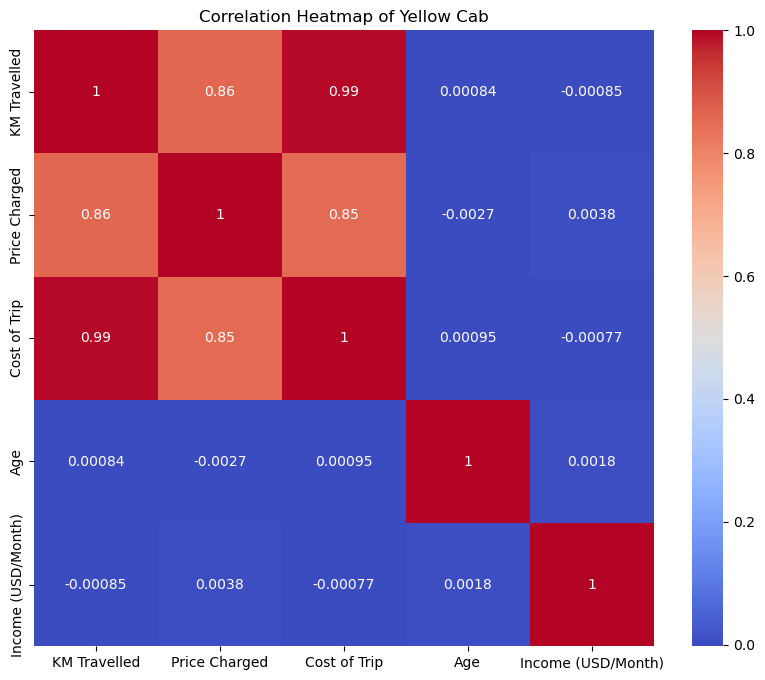

In [15]:
# Compute the correlation matrix
correlation_matrix1 = YellowCab_corr.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Yellow Cab')
plt.show()


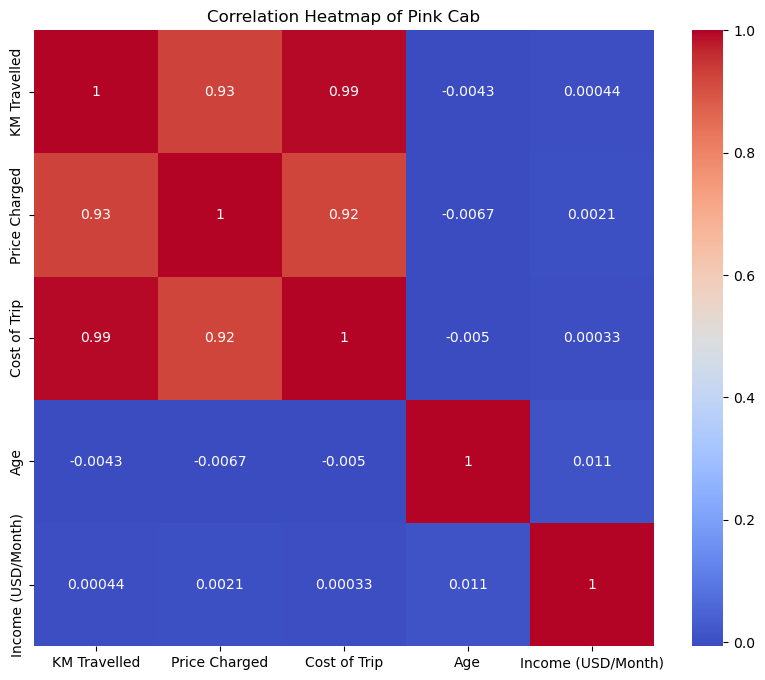

In [16]:
# Compute the correlation matrix
correlation_matrix2 = PinkCab_corr.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Pink Cab')
plt.show()

## There is a positive correlation with the distance and for cost of trip for both cab companies. Based on the results, I can infer that distance is an important factor in determining the charged price. The Yellow cab has higher prices compared to the Pink cab company.

In [17]:
#Split cab companies into 2 datasets

PinkCab = master_df[master_df['Company']=='Pink Cab']
YellowCab = master_df[master_df['Company']=='Yellow Cab']

In [18]:
plot0 = PinkCab[PinkCab.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

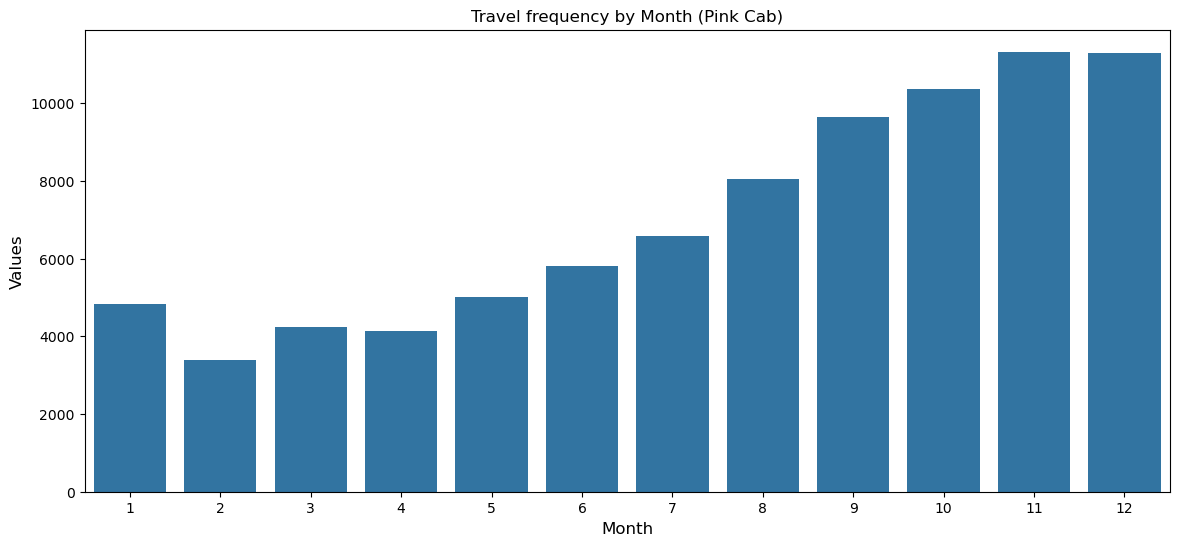

In [19]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

## **Pink Cab:** Customers travel more in the later months in a year; with the 11th and 12th months having the most car trips.

In [20]:
plot1 = YellowCab[YellowCab.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

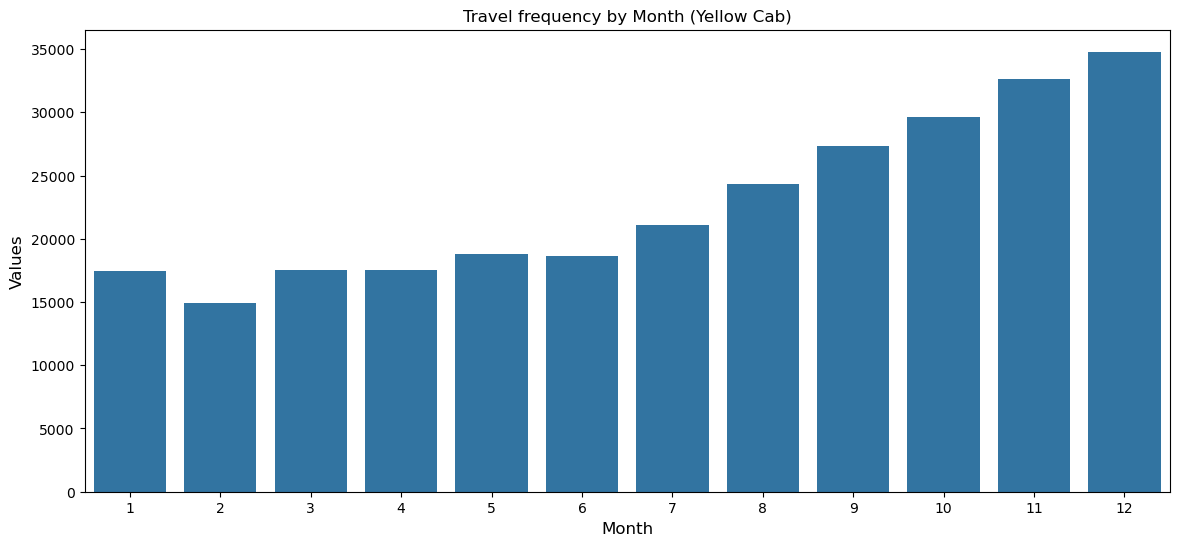

In [21]:
#Plot monthly transactions for yellow cab
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month (Yellow Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

## **Yellow Cab:** Customers also travel more in the later months in a year. With the 12th month having the highest car trips. There are about 2x more car trips with the Yellow Cab company compared to the Pink Cab company.

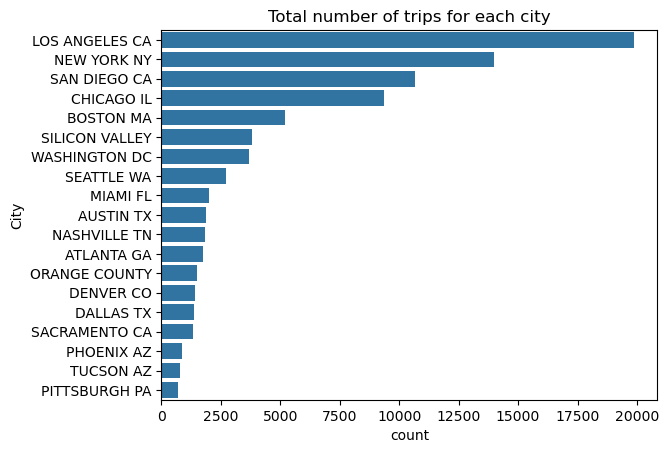

In [22]:
sns.countplot(data=PinkCab, y='City', order=PinkCab['City'].value_counts().index)
plt.title('Total number of trips for each city')
plt.show()

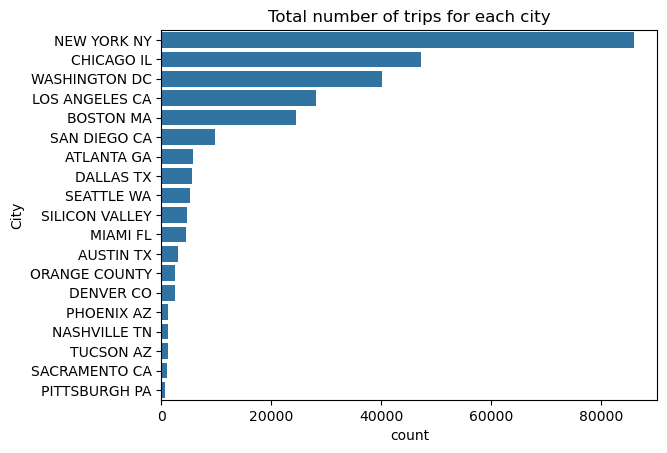

In [23]:
sns.countplot(data=YellowCab, y='City', order=YellowCab['City'].value_counts().index)
plt.title('Total number of trips for each city')
plt.show()

## Los Angeles, CA has the most traffic for the Pink Cab company whereas New York, NY has the most traffic for the Yello Cab company.

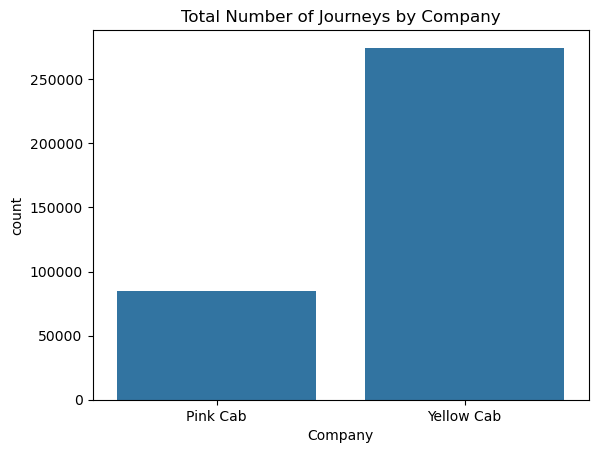

In [24]:
sns.countplot(data=master_df, x='Company')
plt.title('Total Number of Journeys by Company')
plt.show()

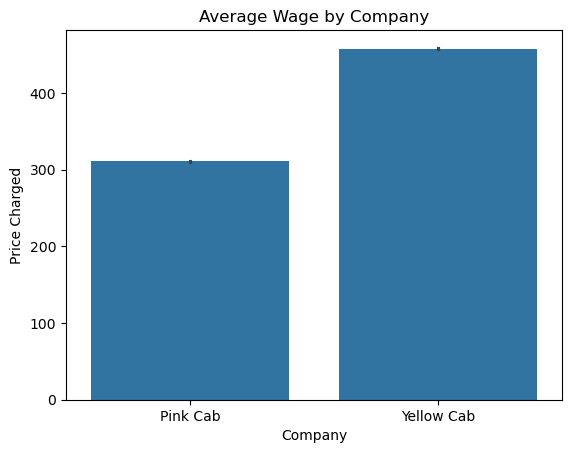

In [25]:
sns.barplot(data=master_df, x='Company', y='Price Charged')
plt.title('Average Wage by Company')
plt.show()

## There are more car trips and higher price charges with the Yellow Cab company compared to the Pink Cab company.

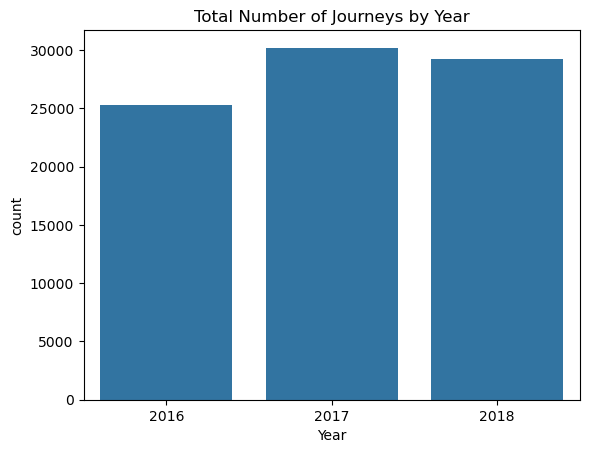

In [26]:
sns.countplot(data=PinkCab, x='Year')
plt.title('Total Number of Journeys by Year')
plt.show()

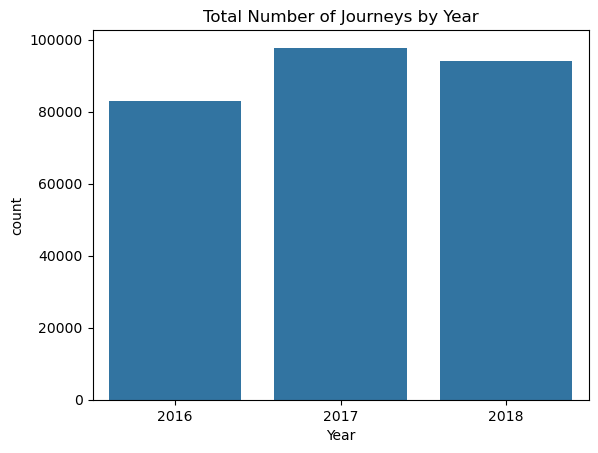

In [27]:
sns.countplot(data=YellowCab, x='Year')
plt.title('Total Number of Journeys by Year')
plt.show()

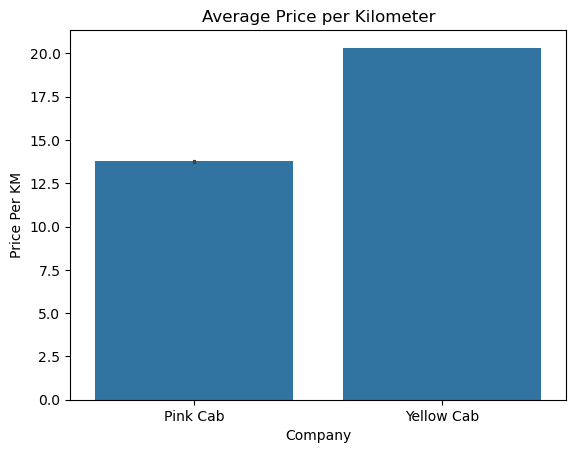

In [28]:
master_df['Price Per KM'] = master_df['Price Charged'] / master_df['KM Travelled']
sns.barplot(data=master_df, x='Company', y='Price Per KM')
plt.title('Average Price per Kilometer')
plt.show()

## The Yellow Cab company charges a higher price per KM compared to the Pink Cab company. 

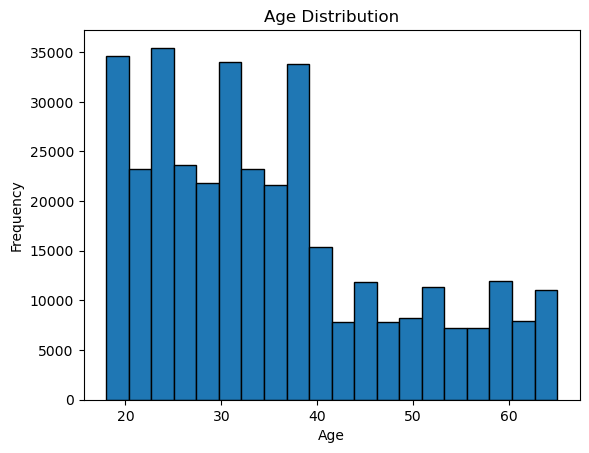

In [29]:
plt.hist(master_df['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## The most common customers are between 18-38 years old.

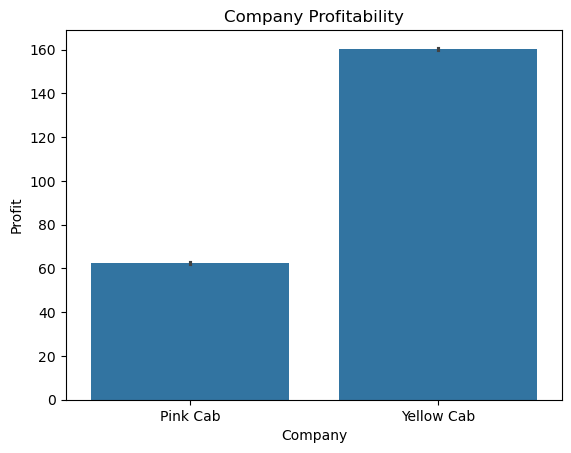

In [30]:
master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']
sns.barplot(data=master_df, x='Company', y='Profit')
plt.title('Company Profitability')
plt.show()

## The Yellow Cab company has higher profit than the Pink Cab company.

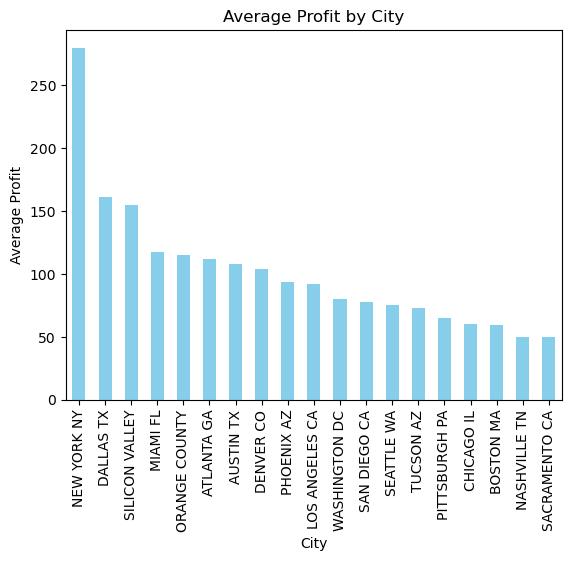

In [31]:
city_profit =master_df.groupby('City')['Profit'].mean().sort_values(ascending=False)
city_profit.plot(kind='bar', color='skyblue')
plt.title('Average Profit by City')
plt.ylabel('Average Profit')
plt.show()

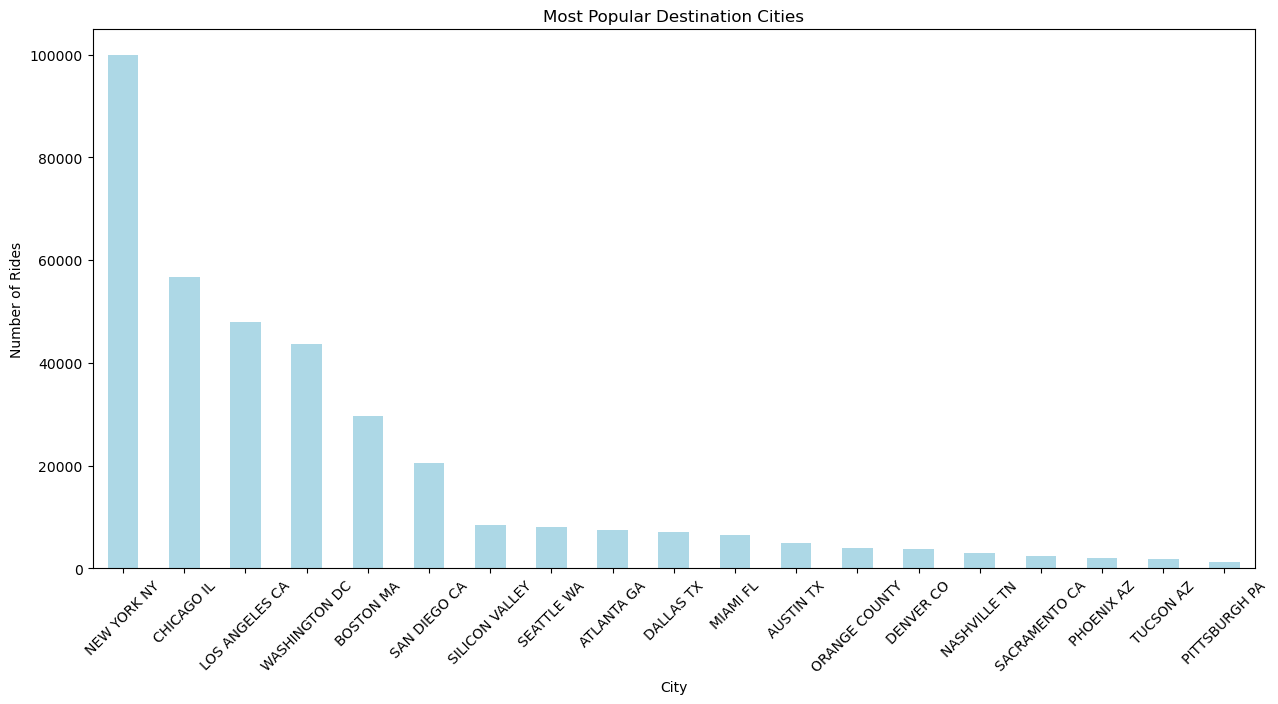

In [32]:
popular_destinations = master_df['City'].value_counts()

plt.figure(figsize=(15,7))
popular_destinations.plot(kind='bar', color='lightblue')
plt.title('Most Popular Destination Cities')
plt.ylabel('Number of Rides')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

## New York has the most profit compared to every other city. There is a huge difference compared to other cities. There are almost 100,000 rides for New York while the second most popular city is almost to 60,000; which is a huge difference. 

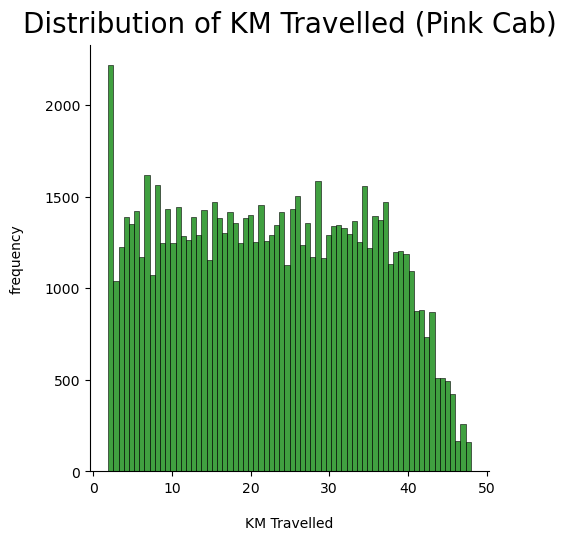

In [33]:
ax = sns.displot(PinkCab['KM Travelled'], kde=False, color='green', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

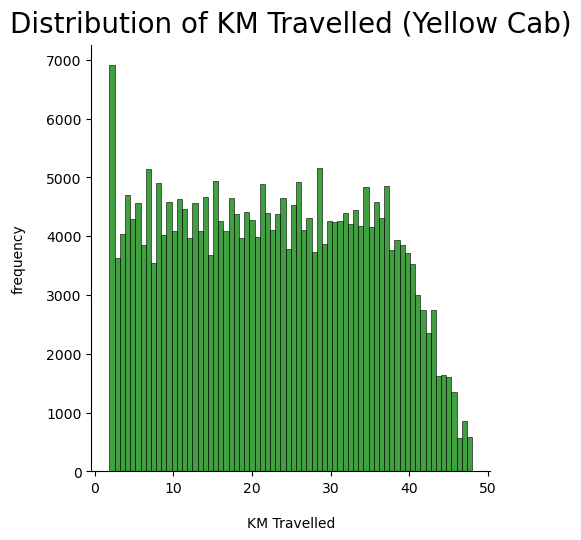

In [34]:
ax = sns.displot(YellowCab['KM Travelled'], kde=False, color='green', bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

## Most trips make up to 48 KM in distance; with 2 KM being the most common.  

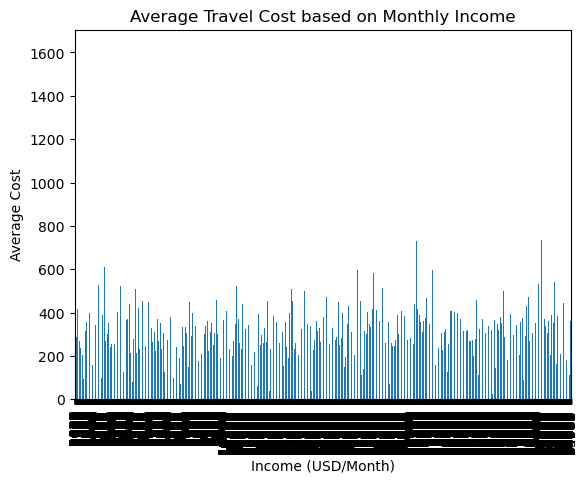

In [35]:
average_cost_income = PinkCab.groupby('Income (USD/Month)')['Price Charged'].mean()
average_cost_income.plot(kind='bar')
plt.title("Average Travel Cost based on Monthly Income")
plt.ylabel("Average Cost")
plt.show()

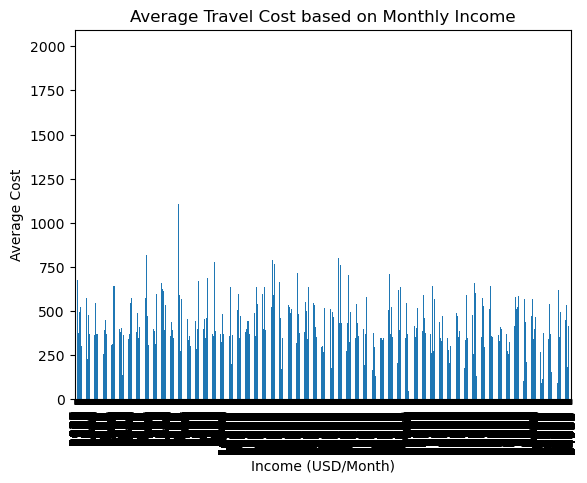

In [36]:
average_cost_income = YellowCab.groupby('Income (USD/Month)')['Price Charged'].mean()
average_cost_income.plot(kind='bar')
plt.title("Average Travel Cost based on Monthly Income")
plt.ylabel("Average Cost")
plt.show()

## The average travel cost is higher in the Yellow Cab company.

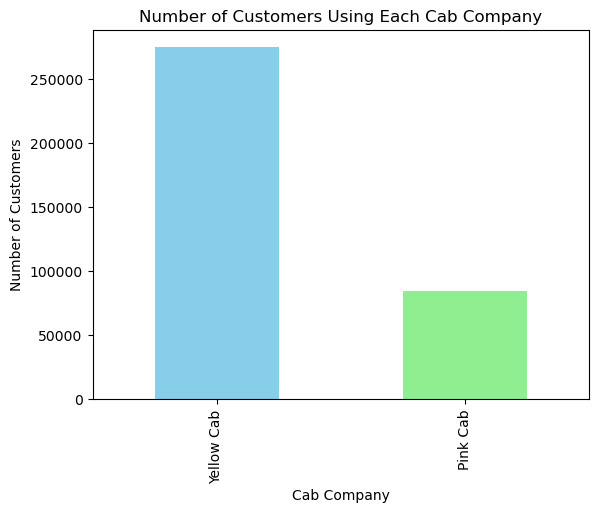

In [37]:
master_df['Company'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Customers Using Each Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.show()

In [73]:
Custcount= master_df.groupby('Company')['Transaction_ID'].count()
print(Custcount)

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64


## The Yellow Cab company has almost 2x more customers than the Pink Cab company.

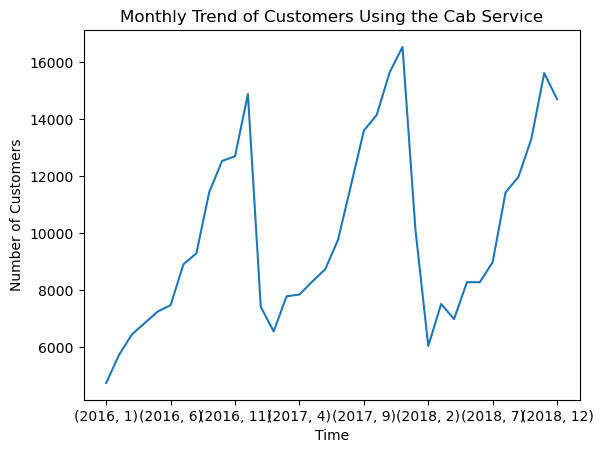

In [38]:
master_df.groupby(['Year', 'Month']).size().plot(kind='line')
plt.title('Monthly Trend of Customers Using the Cab Service')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.show()

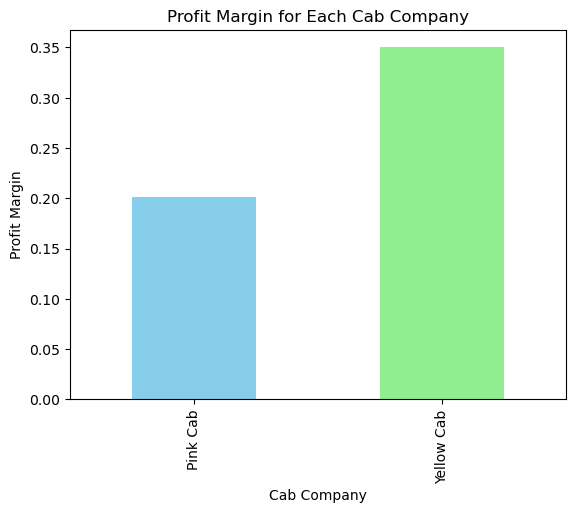

In [39]:
profit_margin = master_df.groupby('Company')['Profit'].sum() / master_df.groupby('Company')['Price Charged'].sum()
profit_margin.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Profit Margin for Each Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Profit Margin')
plt.show()

## There is a higher profit margin with the Yellow Cab company.

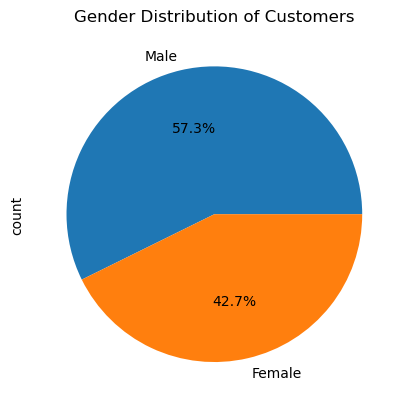

In [40]:
master_df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

# Hypothesis Results

## Which cab company has a higher profit?

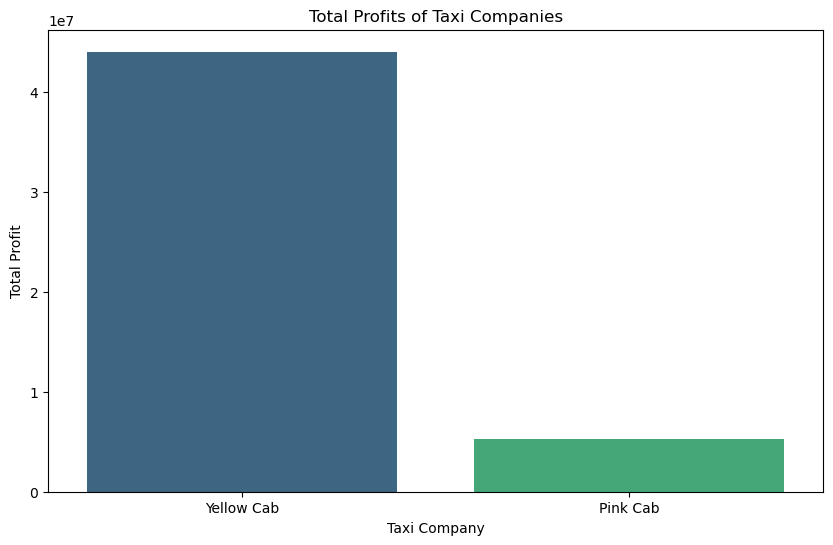

In [41]:
company_profit = master_df.groupby('Company')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=company_profit.index, y=company_profit.values, palette='viridis', legend=False)
plt.title('Total Profits of Taxi Companies')
plt.ylabel('Total Profit')
plt.xlabel('Taxi Company')
plt.show()

## Based on this graph, the Yellow Cab company has a higher total profit overall.

## 

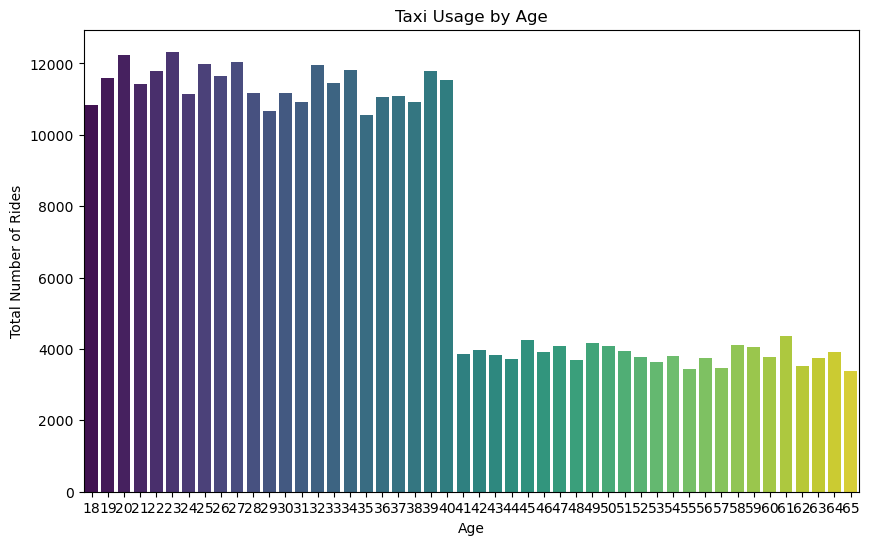

In [42]:
demographic_usage = master_df.groupby('Age')['Transaction_ID'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=demographic_usage.index, y=demographic_usage.values, palette='viridis')
plt.title('Taxi Usage by Age')
plt.ylabel('Total Number of Rides')
plt.xlabel('Age')
plt.show()

## Customers between 18-40 frequent more often in cab rides. This age range includes young adults and adults. 

Object `city` not found.


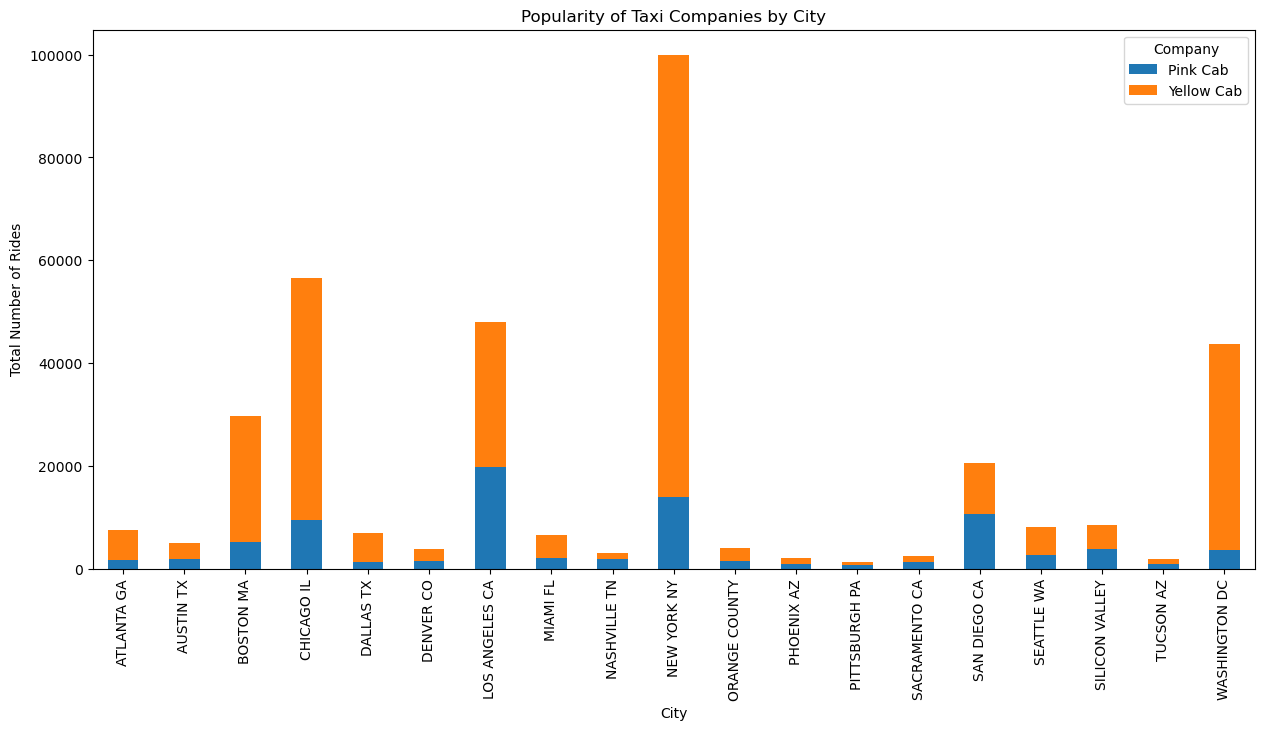

In [46]:
city_company_popularity = master_df.groupby(['City', 'Company'])['Transaction_ID'].count().unstack()

city_company_popularity.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Popularity of Taxi Companies by City')
plt.ylabel('Total Number of Rides')
plt.xlabel('City')show() city?


## The Yellow Cab company is more popular in the majority of the cities listed in this dataset. 

## At which age do most customers fall under?

In [47]:
demographic_usage = master_df.groupby('Age')['Transaction_ID'].count()
highest_usage_age_group = demographic_usage.idxmax()
highest_usage = demographic_usage.max()

highest_usage_age_group, highest_usage

(23, 12327)

In [50]:
plt.figure(figsize=(10, 5))

demographic_usage_sorted = demographic_usage.sort_values(ascending=False)
demographic_usage_sorted


Age
23    12327
20    12229
27    12030
25    11973
32    11959
34    11825
39    11798
22    11796
26    11655
19    11591
40    11536
33    11457
21    11431
30    11165
28    11163
24    11151
37    11086
36    11054
31    10930
38    10906
18    10846
29    10675
35    10555
61     4361
45     4248
49     4158
58     4107
50     4089
47     4087
59     4068
42     3970
51     3931
46     3918
64     3908
41     3852
43     3823
54     3810
52     3784
60     3775
56     3742
63     3733
44     3725
48     3700
53     3641
62     3530
57     3473
55     3442
65     3379
Name: Transaction_ID, dtype: int64

<Figure size 1000x500 with 0 Axes>

## The most common age for a customer is 23.

## Which city does the Pink Cab company dominate?

In [51]:
city_company_popularity = master_df[master_df['Company'] == 'Pink Cab'].groupby('City')['Transaction_ID'].count()
city_yellow_popularity = master_df[master_df['Company'] == 'Yellow Cab'].groupby('City')['Transaction_ID'].count()

cities_where_pink_more_popular = city_company_popularity[city_company_popularity > city_yellow_popularity].index.tolist()
cities_where_pink_more_popular

['NASHVILLE TN', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA']

In [52]:
city_company_popularity_sorted = city_company_popularity.sort_values(ascending=False)
city_yellow_popularity_sorted = city_yellow_popularity.sort_values(ascending=False)

city_company_popularity_sorted, city_yellow_popularity_sorted

(City
 LOS ANGELES CA    19865
 NEW YORK NY       13967
 SAN DIEGO CA      10672
 CHICAGO IL         9361
 BOSTON MA          5186
 SILICON VALLEY     3797
 WASHINGTON DC      3692
 SEATTLE WA         2732
 MIAMI FL           2002
 AUSTIN TX          1868
 NASHVILLE TN       1841
 ATLANTA GA         1762
 ORANGE COUNTY      1513
 DENVER CO          1394
 DALLAS TX          1380
 SACRAMENTO CA      1334
 PHOENIX AZ          864
 TUCSON AZ           799
 PITTSBURGH PA       682
 Name: Transaction_ID, dtype: int64,
 City
 NEW YORK NY       85918
 CHICAGO IL        47264
 WASHINGTON DC     40045
 LOS ANGELES CA    28168
 BOSTON MA         24506
 SAN DIEGO CA       9816
 ATLANTA GA         5795
 DALLAS TX          5637
 SEATTLE WA         5265
 SILICON VALLEY     4722
 MIAMI FL           4452
 AUSTIN TX          3028
 ORANGE COUNTY      2469
 DENVER CO          2431
 PHOENIX AZ         1200
 NASHVILLE TN       1169
 TUCSON AZ          1132
 SACRAMENTO CA      1033
 PITTSBURGH PA       631
 

## Based on these results, the Yellow Cab company dominates in majority of the cities according to the numerical data.

## Which payment method do most customers utilize?

In [53]:
payment_mode_popularity = master_df.groupby('Payment_Mode')['Transaction_ID'].count()
most_popular_payment_mode = payment_mode_popularity.idxmax()
number_of_transactions = payment_mode_popularity.max()

most_popular_payment_mode, number_of_transactions

('Card', 215504)

### Most popular payment method for Pink Cab company

In [56]:
Pinkpayment_mode_popularity = PinkCab.groupby('Payment_Mode')['Transaction_ID'].count()
most_popular_payment_mode = Pinkpayment_mode_popularity.idxmax()
number_of_transactions = Pinkpayment_mode_popularity.max()

most_popular_payment_mode, number_of_transactions

('Card', 50719)

In [57]:
Yellowpayment_mode_popularity = YellowCab.groupby('Payment_Mode')['Transaction_ID'].count()
most_popular_payment_mode = Yellowpayment_mode_popularity.idxmax()
number_of_transactions = Yellowpayment_mode_popularity.max()

most_popular_payment_mode, number_of_transactions

('Card', 164785)

## The most popular payment method is Card; with the Yellow Cab company leading in transactions. 

## Which gender do most customers fall under?

In [59]:
gender_usage = master_df.groupby('Gender')['Transaction_ID'].count()
predominant_gender = gender_usage.idxmax()
gender_usage_count = gender_usage.max()

predominant_gender, gender_usage_count

('Male', 205912)

In [61]:
gender_usage_sorted = gender_usage.sort_values(ascending=False)
gender_usage_sorted

Gender
Male      205912
Female    153480
Name: Transaction_ID, dtype: int64

## Which months are taxis used the most?

In [65]:
month_usage = master_df.groupby('Month')['Transaction_ID'].count()
peak_month = month_usage.idxmax()
peak_month_usage = month_usage.max()

peak_month, peak_month_usage

(12, 46093)

## The last month has the most car trips. 

## In which city are taxis used the most?

In [67]:
city_usage = master_df.groupby('City')['Transaction_ID'].count()
most_used_city = city_usage.idxmax()
city_usage_count = city_usage.max()

most_used_city, city_usage_count

('NEW YORK NY', 99885)

In [69]:
city_usage = master_df.groupby('City')['Transaction_PID'].count()
least_used_city = city_usage.idxmin()
city_usage_count = city_usage.min()

least_used_city, city_usage_count

('PITTSBURGH PA', 1313)

## New York has the most cab trips while Pittsburgh has the least.

# Recommendation

## Based on the hypothesis results, I recommend that XYZ Firm invest in the Yellow Cab Company, as it demonstrates greater profitability and market dominance compared to its competitor, Pink Cab. Yellow Cab is the preferred service in major cities, including New York, Dallas, and Silicon Valley, which rank highest in average profits. Notably, New York, the city with the most cab rides, also shows higher profitability, with Yellow Cab leading the market. Additionally, Yellow Cab serves 274,681 customers, significantly more than Pink Cab’s 84,711, and charges higher fares, resulting in a greater profit margin. These factors indicate that Yellow Cab consistently outperforms its competitor in both customer reach and revenue. Therefore, investing in Yellow Cab would be a strategic and profitable decision for XYZ Firm.